# French road accidents 2022
The aim of this analysis is to ...

## Data analysis

In [2]:
import numpy   as np
import pandas  as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df_victims  = pd.read_csv('data/usagers-2022.csv'        , sep=';')
df_vehicles = pd.read_csv('data/vehicules-2022.csv'      , sep=';')
df_charac   = pd.read_csv('data/carcteristiques-2022.csv', sep=';')
df_places   = pd.read_csv('data/lieux-2022.csv'          , sep=';')

C:\Users\malou\AppData\Local\Temp\ipykernel_16788\3246205560.py:4: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df_places   = pd.read_csv('data/lieux-2022.csv'          , sep=';')


In [4]:
print(f'The df_victims dataframe looks like :  \n {df_victims.head()} \n')
print(f'The df_vehicles dataframe looks like : \n {df_vehicles.head()}\n')
print(f'The df_charac dataframe looks like :   \n {df_charac.head()}  \n')
print(f'The df_places dataframe looks like :   \n {df_places.head()}  \n')

The df_victims dataframe looks like :  
         Num_Acc  id_usager id_vehicule num_veh  place  catu  grav  sexe  \
0  202200000001  1 099 700     813 952     A01      1     1     3     1   
1  202200000001  1 099 701     813 953     B01      1     1     1     1   
2  202200000002  1 099 698     813 950     B01      1     1     4     1   
3  202200000002  1 099 699     813 951     A01      1     1     1     1   
4  202200000003  1 099 696     813 948     A01      1     1     1     1   

   an_nais  trajet  secu1  secu2  secu3  locp actp  etatp  
0   2008.0       5      2      8     -1    -1   -1     -1  
1   1948.0       5      1      8     -1    -1   -1     -1  
2   1988.0       9      1      0     -1     0    0     -1  
3   1970.0       4      1      0     -1     0    0     -1  
4   2002.0       0      1      0     -1    -1   -1     -1   

The df_vehicles dataframe looks like : 
         Num_Acc id_vehicule num_veh  senc  catv  obs  obsm  choc  manv  motor  \
0  202200000001     813 

In [5]:
print("Users - NaN count per column :          \n", df_victims.isnull().sum())
print("Vehicles - NaN count per column:        \n", df_vehicles.isnull().sum())
print("Characteristics - NaN count per column: \n", df_charac.isnull().sum())
print("Places - NaN count per column:          \n", df_places.isnull().sum())

Users - NaN count per column :          
 Num_Acc           0
id_usager         0
id_vehicule       0
num_veh           0
place             0
catu              0
grav              0
sexe              0
an_nais        2874
trajet            0
secu1             0
secu2             0
secu3             0
locp              0
actp              0
etatp             0
dtype: int64
Vehicles - NaN count per column:        
 Num_Acc            0
id_vehicule        0
num_veh            0
senc               0
catv               0
obs                0
obsm               0
choc               0
manv               0
motor              0
occutc         93676
dtype: int64
Characteristics - NaN count per column: 
 Accident_Id       0
jour              0
mois              0
an                0
hrmn              0
lum               0
dep               0
com               0
agg               0
int               0
atm               0
col               0
adr            1233
lat               0
long             

A portion of the birth year data for drivers is missing in the drivers' dataframe.

In the case of accidents, the column 'occutc' in the vehicles dataframe records the number of victims if the accident involves a public transport vehicle.

The 'adr' column in the characteristics dataframe contains the postal code of the agglomeration where the accident occurred. Since accidents do not necessarily happen within an agglomeration, this explains the missing data in this column.

The places dataframe contains several incomplete columns:

'voie': road number
'v2': alphanumeric identifier of the road
'lartpc': width of the road's center terrace, if it exists
We can conclude that the missing data is not critical for our analysis, as it does not introduce any bias into the study.


For more information on the different columns of these datasets, you can have a look at the PDF file 'description-des-bases-de-donnees-annuelles-2022'

In [6]:
print("Users - Percentage of NaN per column:\n", df_victims.isnull().mean() * 100)
print("Vehicles - Percentage of NaN per column:\n", df_vehicles.isnull().mean() * 100)
print("Characteristics - Percentage of NaN per column:\n", df_charac.isnull().mean() * 100)
print("Places - Percentage of NaN per column:\n", df_places.isnull().mean() * 100)

Users - Percentage of NaN per column:
 Num_Acc        0.000000
id_usager      0.000000
id_vehicule    0.000000
num_veh        0.000000
place          0.000000
catu           0.000000
grav           0.000000
sexe           0.000000
an_nais        2.269031
trajet         0.000000
secu1          0.000000
secu2          0.000000
secu3          0.000000
locp           0.000000
actp           0.000000
etatp          0.000000
dtype: float64
Vehicles - Percentage of NaN per column:
 Num_Acc         0.000000
id_vehicule     0.000000
num_veh         0.000000
senc            0.000000
catv            0.000000
obs             0.000000
obsm            0.000000
choc            0.000000
manv            0.000000
motor           0.000000
occutc         99.135386
dtype: float64
Characteristics - Percentage of NaN per column:
 Accident_Id    0.000000
jour           0.000000
mois           0.000000
an             0.000000
hrmn           0.000000
lum            0.000000
dep            0.000000
com          

In [45]:
duplicates_victims  = df_victims.duplicated().sum()
duplicates_vehicles = df_vehicles.duplicated().sum()
duplicates_charac   = df_charac.duplicated().sum()
duplicates_places   = df_places.duplicated().sum()

print(f"Duplicates in victims dataframe         : {duplicates_victims}")
print(f"Duplicates in vehicles dataframe        : {duplicates_vehicles}")
print(f"Duplicates in characteristics dataframe : {duplicates_charac}")
print(f"Duplicates in places dataframe          : {duplicates_places}")


Duplicates in victims dataframe         : 0
Duplicates in vehicles dataframe        : 0
Duplicates in characteristics dataframe : 0
Duplicates in places dataframe          : 0


## EDA on victims dataset
### Distribution of the age

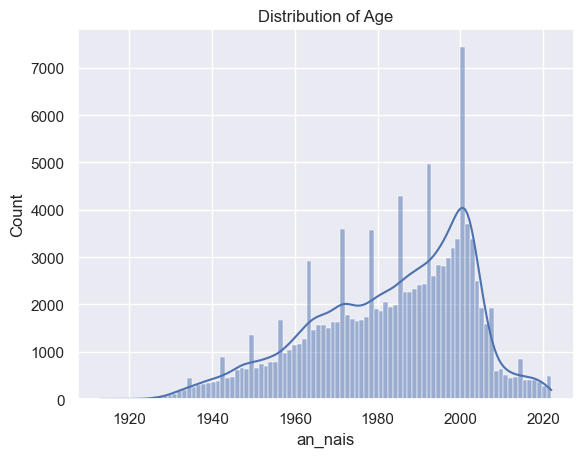

In [8]:
sns.set_theme()
sns.histplot(df_victims['an_nais'], kde=True)
plt.title('Distribution of Age')
plt.show()

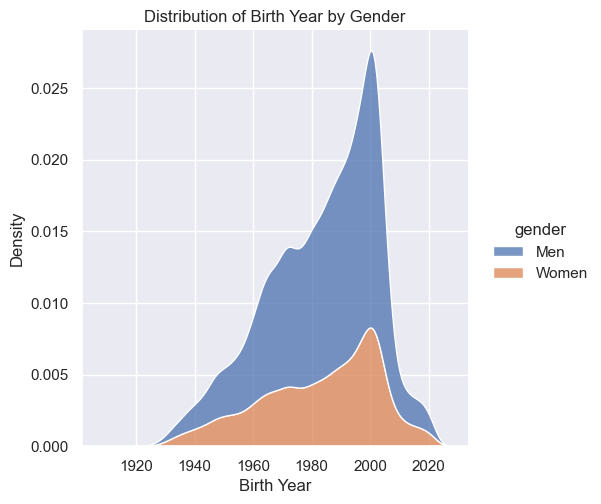

In [9]:
df_victims['gender'] = df_victims['sexe'].map({1: 'Men', 2: 'Women'})

sns.displot(df_victims, x="an_nais", hue="gender", kind="kde", multiple="stack")

plt.title('Distribution of Birth Year by Gender')
plt.xlabel('Birth Year')
plt.ylabel('Density')
plt.show()


### Distribution of the severity of the accidents

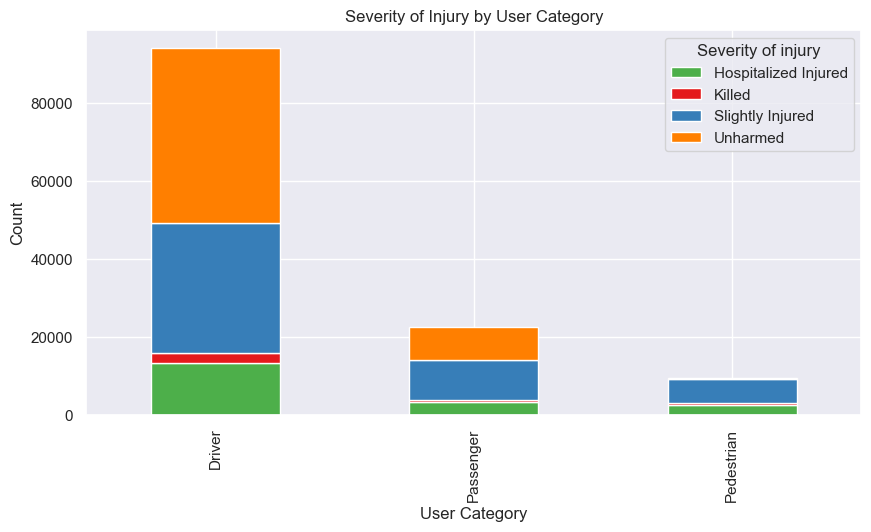

In [10]:
df_victims['catu_label'] = df_victims['catu'].map({1: 'Driver', 2: 'Passenger', 3: 'Pedestrian'})
df_victims['grav_label'] = df_victims['grav'].map({1: 'Unharmed', 2: 'Killed', 3: 'Hospitalized Injured', 4: 'Slightly Injured'})

pivot_data = df_victims.pivot_table(index='catu_label', columns='grav_label', aggfunc='size', fill_value=0)

pivot_data.plot(kind='bar', stacked=True, figsize=(10, 5), color=['#4daf4a', '#e41a1c', '#377eb8', '#ff7f00'])

plt.title('Severity of Injury by User Category')
plt.xlabel('User Category')
plt.ylabel('Count')
plt.legend(title='Severity of injury', loc='upper right')
plt.show()


In [11]:
gender_severity = df_victims.groupby('sexe_label')['grav_label'].value_counts(normalize=True).unstack()

fig, axes = plt.subplots(1, 2, figsize=(12, 8))

gender_severity.loc['Men'].plot.pie(ax=axes[0], autopct='%1.1f%%', startangle=90, labels=None, colors=sns.color_palette('Set1'))
axes[0].set_title('Men')
axes[0].set_ylabel('')

gender_severity.loc['Women'].plot.pie(ax=axes[1], autopct='%1.1f%%', startangle=90, labels=None, colors=sns.color_palette('Set1'))
axes[1].set_title('Women')
axes[1].set_ylabel('')

fig.legend(gender_severity.columns, title='Severity of injury', loc='center left', bbox_to_anchor=(1, 0.5))

plt.suptitle('Severity of injury by gender')
plt.tight_layout()
plt.show()


KeyError: 'sexe_label'

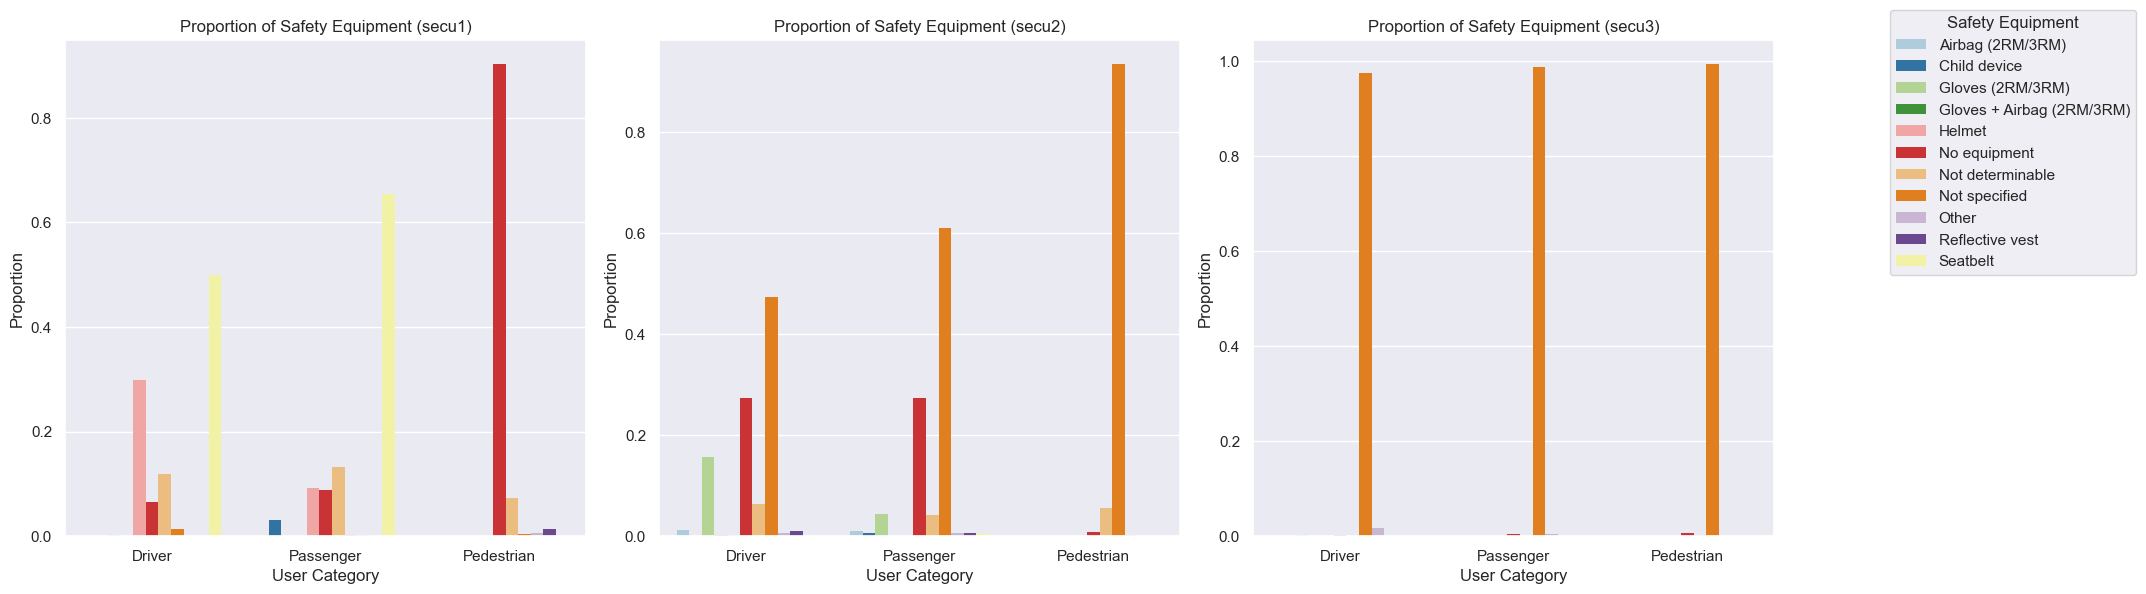

In [94]:
security_labels = {
    -1: 'Not specified',
    0: 'No equipment',
    1: 'Seatbelt',
    2: 'Helmet',
    3: 'Child device',
    4: 'Reflective vest',
    5: 'Airbag (2RM/3RM)',
    6: 'Gloves (2RM/3RM)',
    7: 'Gloves + Airbag (2RM/3RM)',
    8: 'Not determinable',
    9: 'Other'
}

df_victims['secu1_label'] = df_victims['secu1'].map(security_labels)
df_victims['secu2_label'] = df_victims['secu2'].map(security_labels)
df_victims['secu3_label'] = df_victims['secu3'].map(security_labels)

df_grouped_secu1 = df_victims.groupby(['catu_label', 'grav_label', 'secu1_label']).size().reset_index(name='count')
df_grouped_secu1['proportion'] = df_grouped_secu1.groupby(['catu_label', 'grav_label'])['count'].transform(lambda x: x / x.sum())
df_grouped_secu1 = df_grouped_secu1.sort_values('secu1_label')

df_grouped_secu2 = df_victims.groupby(['catu_label', 'grav_label', 'secu2_label']).size().reset_index(name='count')
df_grouped_secu2['proportion'] = df_grouped_secu2.groupby(['catu_label', 'grav_label'])['count'].transform(lambda x: x / x.sum())
df_grouped_secu2 = df_grouped_secu2.sort_values('secu2_label')

df_grouped_secu3 = df_victims.groupby(['catu_label', 'grav_label', 'secu3_label']).size().reset_index(name='count')
df_grouped_secu3['proportion'] = df_grouped_secu3.groupby(['catu_label', 'grav_label'])['count'].transform(lambda x: x / x.sum())
df_grouped_secu3 = df_grouped_secu3.sort_values('secu3_label')

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.barplot(data=df_grouped_secu1, x='catu_label', y='proportion', hue='secu1_label', ax=axes[0], palette='Paired', edgecolor='none', errorbar=None)
axes[0].set_title('Proportion of Safety Equipment (secu1)')
axes[0].set_ylabel('Proportion')
axes[0].set_xlabel('User Category')

sns.barplot(data=df_grouped_secu2, x='catu_label', y='proportion', hue='secu2_label', ax=axes[1], palette='Paired', edgecolor='none', errorbar=None)
axes[1].set_title('Proportion of Safety Equipment (secu2)')
axes[1].set_ylabel('Proportion')
axes[1].set_xlabel('User Category')

sns.barplot(data=df_grouped_secu3, x='catu_label', y='proportion', hue='secu3_label', ax=axes[2], palette='Paired', edgecolor='none', errorbar=None)
axes[2].set_title('Proportion of Safety Equipment (secu3)')
axes[2].set_ylabel('Proportion')
axes[2].set_xlabel('User Category')

handles, labels = axes[0].get_legend_handles_labels()
axes[0].legend_.remove()
axes[1].legend_.remove()
axes[2].legend_.remove()
fig.legend(handles, labels, title='Safety Equipment', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


## Geographical analysis

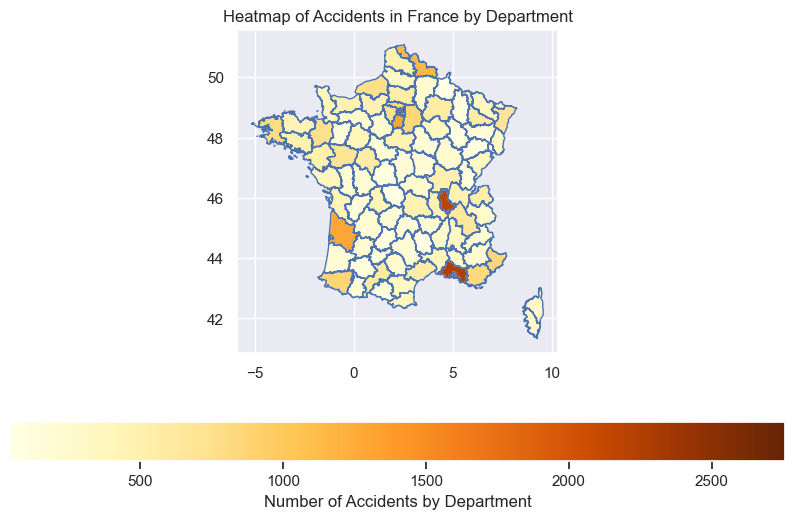

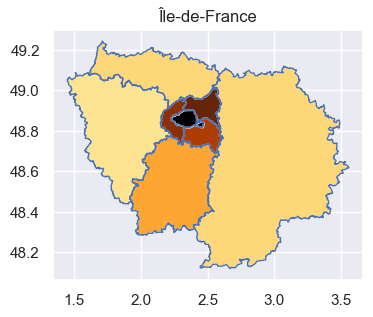

In [107]:
import geopandas as gpd
import matplotlib.pyplot as plt

accidents_by_dept = df_charac['dep'].value_counts().reset_index()
accidents_by_dept.columns = ['department', 'accidents']

geo_data = gpd.read_file('data/departements.geojson')
geo_data = geo_data.merge(accidents_by_dept, left_on='code', right_on='department', how='left')

# Exclude Paris (department 75) from the min/max calculation
geo_data_without_paris = geo_data[geo_data['department'] != '75']

# Calculate the min and max for color scaling, excluding Paris
vmin = geo_data_without_paris['accidents'].min()
vmax = geo_data_without_paris['accidents'].max()

# Plot the main map without Paris
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
geo_data_without_paris.boundary.plot(ax=ax, linewidth=1)

geo_data_without_paris.plot(column='accidents', ax=ax, legend=True,
              legend_kwds={'label': "Number of Accidents by Department",
                           'orientation': "horizontal"},
              cmap='YlOrBr', vmin=vmin, vmax=vmax, missing_kwds={"color": "lightgrey"})

plt.title('Heatmap of Accidents in France by Department')

# Plot Paris separately with a distinct black color
geo_data_paris = geo_data[geo_data['department'] == '75']
geo_data_paris.boundary.plot(ax=ax, linewidth=1)
geo_data_paris.plot(ax=ax, color='black', legend=False)

# Create a zoomed-in view for Île-de-France, including Paris (75)
fig_inset, ax_inset = plt.subplots(figsize=(4, 4))
ile_de_france = geo_data[geo_data['department'].isin(['75', '77', '78', '91', '92', '93', '94', '95'])]

ile_de_france.boundary.plot(ax=ax_inset, linewidth=1)
ile_de_france.plot(column='accidents', ax=ax_inset, cmap='YlOrBr', vmin=vmin, vmax=vmax, missing_kwds={"color": "lightgrey"})
geo_data_paris.plot(ax=ax_inset, color='black', legend=False)

ax_inset.set_title('Île-de-France')

plt.show()


## Time series Analysis 

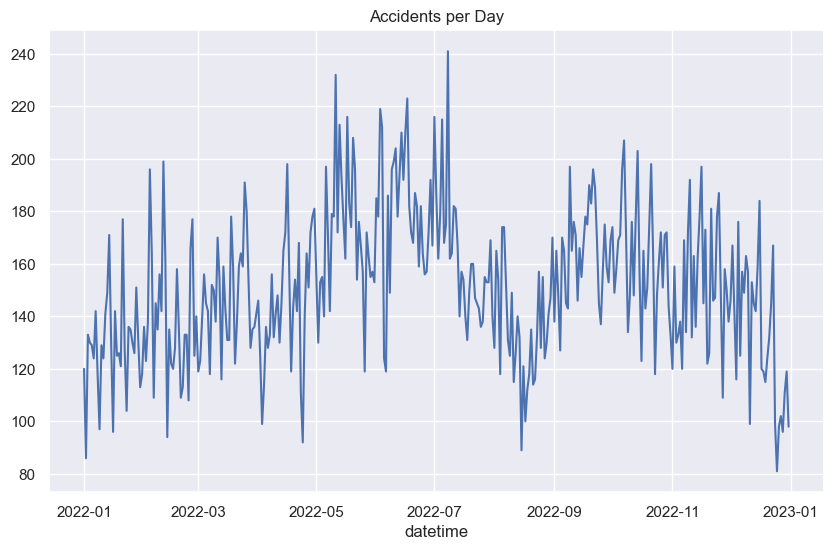

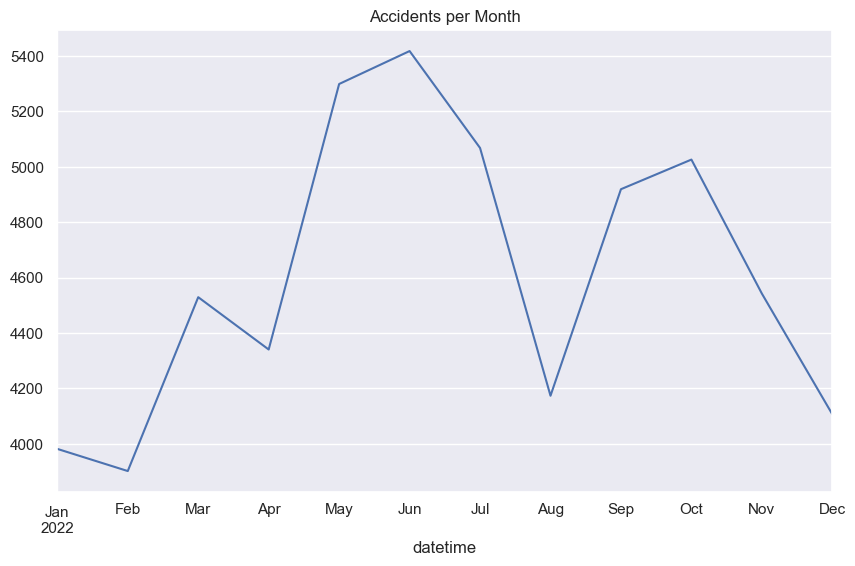

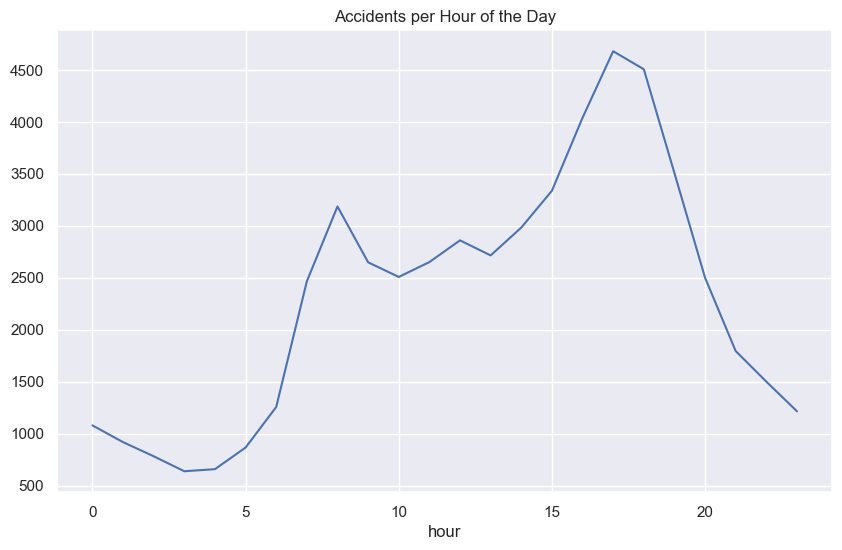

In [23]:
df_charac['hrmn'] = df_charac['hrmn'].astype(str)
df_charac['hrmn'] = df_charac['hrmn'].str.replace(':', '', regex=False)
df_charac['hrmn'] = df_charac['hrmn'].str.zfill(4)

df_charac['hour'] = df_charac['hrmn'].str[:2].astype(int)
df_charac['minute'] = df_charac['hrmn'].str[2:].astype(int)

df_charac.rename(columns={'an': 'year', 'mois': 'month', 'jour': 'day'}, inplace=True)

df_charac['datetime'] = pd.to_datetime(df_charac[['year', 'month', 'day', 'hour', 'minute']])

accidents_per_day = df_charac.groupby(df_charac['datetime'].dt.date).size()
accidents_per_day.plot(figsize=(10, 6), title='Accidents per Day')
plt.show()

accidents_per_month = df_charac.groupby(df_charac['datetime'].dt.to_period('M')).size()
accidents_per_month.plot(figsize=(10, 6), title='Accidents per Month')
plt.show()

accidents_per_hour = df_charac.groupby(df_charac['hour']).size()
accidents_per_hour.plot(figsize=(10, 6), title='Accidents per Hour of the Day')
plt.show()


<Figure size 1200x600 with 0 Axes>

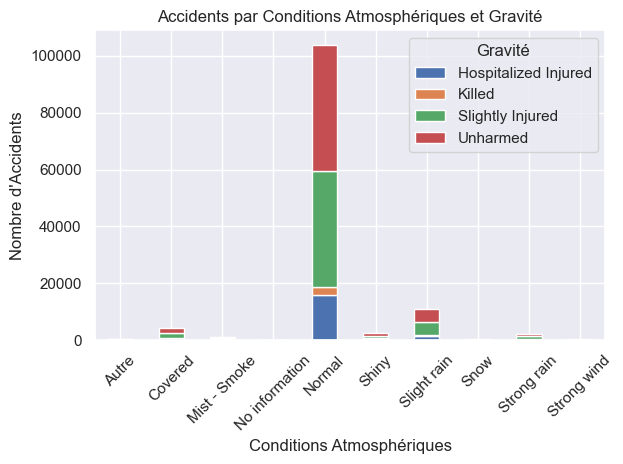

In [33]:
atm_labels = {
    -1: 'No information',
    1: 'Normal',
    2: 'Slight rain',
    3: 'Strong rain',
    4: 'Snow',
    5: 'Mist - Smoke',
    6: 'Strong wind',
    7: 'Shiny',
    8: 'Covered',
    9: 'Autre'
}

grav_labels = {1: 'Unharmed', 
               2: 'Killed'  ,  
               3: 'Hospitalized Injured', 
               4: 'Slightly Injured'}

df_merged = pd.merge(df_charac[['Accident_Id', 'atm']], df_victims[['Num_Acc', 'grav']], 
                      left_on='Accident_Id', right_on='Num_Acc')

df_merged['atm_label'] = df_merged['atm'].map(atm_labels)
df_merged['grav_label'] = df_merged['grav'].map(grav_labels)

count_by_atm_grav = df_merged.groupby(['atm_label', 'grav_label']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 6))
count_by_atm_grav.plot(kind='bar', stacked=True)

plt.title('Accidents par Conditions Atmosphériques et Gravité')
plt.xlabel('Conditions Atmosphériques')
plt.ylabel('Nombre d\'Accidents')
plt.xticks(rotation=45)
plt.legend(title='Gravité')
plt.tight_layout()
plt.show()


<Figure size 1200x600 with 0 Axes>

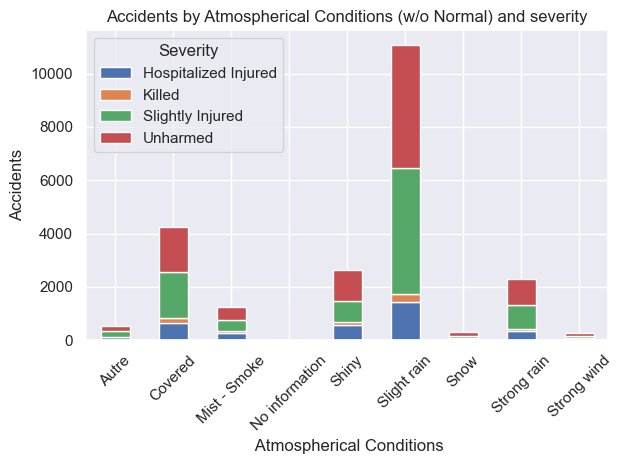

In [35]:
df_wo_norm = df_merged[df_merged['atm_label'] != 'Normal']
count_by_atm_grav  = df_wo_norm.groupby(['atm_label', 'grav_label']).size().unstack(fill_value=0)

# Plot
plt.figure(figsize=(12, 6))
count_by_atm_grav.plot(kind='bar', stacked=True)

plt.title('Accidents by Atmospherical Conditions (w/o Normal) and severity')
plt.xlabel(' Atmospherical Conditions')
plt.ylabel('Accidents')
plt.xticks(rotation=45)
plt.legend(title='Severity')
plt.tight_layout()
plt.show()


## Anomaly detection (isolation forest/autoencoders)

## Clustering : Identify most common cases

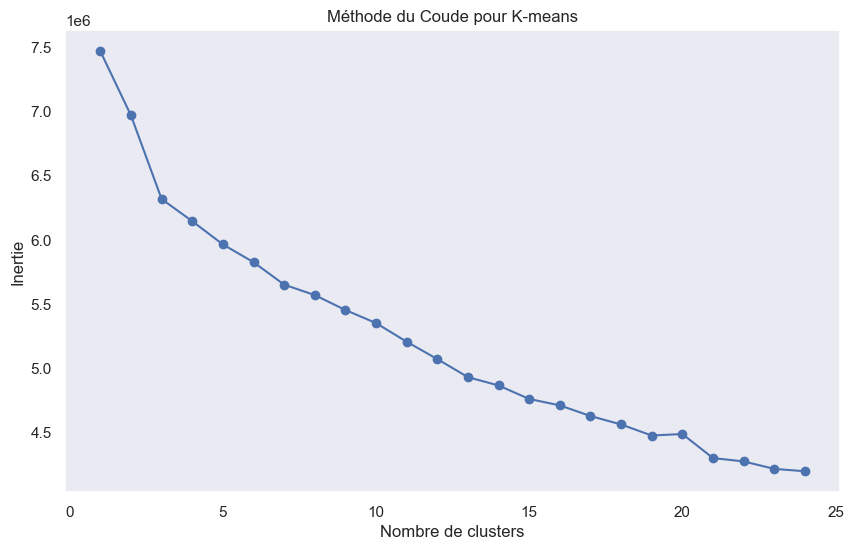

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

df_all = df_charac.merge(df_victims, left_on='Accident_Id', right_on='Num_Acc', how='inner') \
                        .merge(df_vehicles, on='Num_Acc', how='inner') \
                        .merge(df_places, on='Num_Acc', how='inner')

# Choose interesting categorical/numerical features
df_all_features_interest = df_all[[
    'lum', 'agg', 'int', 'atm', 'col', # from characteristics
    'catr', 'circ', 'prof', 'plan', 'surf', 'larrout', 'infra', 'situ', 'vma', # from places
    'senc', 'catv', 'obs', 'obsm', 'choc', 'manv', 'motor', # from vehicles
    'catu', 'grav', 'sexe', 'trajet', 'secu1', 'secu2', 'secu3', 'locp', 'actp', 'etatp' # from victims
                             ]] 
df_all_features_interest = df_all_features_interest.apply(lambda x: x.str.replace(',', '.') if x.dtype == "object" else x)
df_all_features_interest = df_all_features_interest.apply(pd.to_numeric, errors='coerce')
df_all_features_interest = df_all_features_interest.dropna()

# Standardize dataset
scaler = StandardScaler()
features_scaled = scaler.fit_transform(df_all_features_interest)

# Compute the optimal number of clusters with the elbow method and plot the results
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 10), inertia, marker='o')
plt.title('Méthode du Coude pour K-means')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.grid()
plt.show()


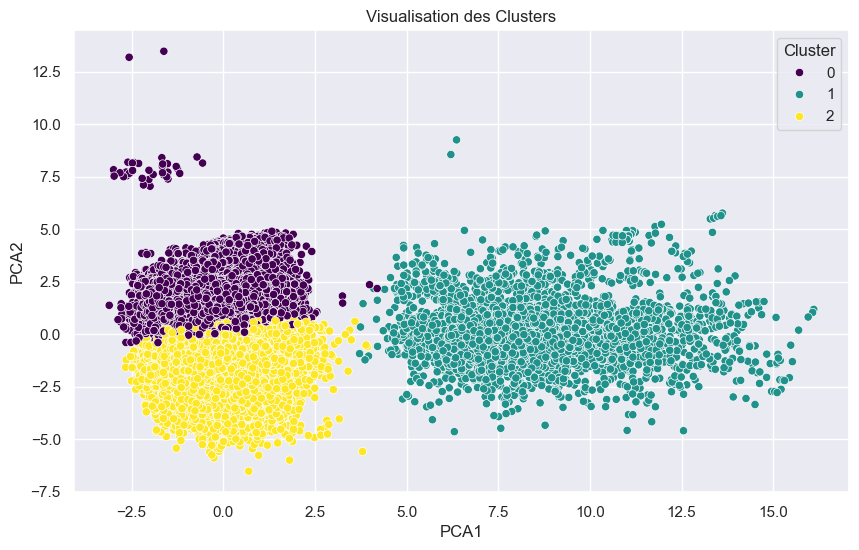

In [55]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(features_scaled)

df_all_features_interest['Cluster'] = clusters

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(features_scaled)

# Créer un dataframe pour la visualisation
df_pca = pd.DataFrame(data=reduced_data, columns=['PCA1', 'PCA2'])
df_pca['Cluster'] = clusters

# Visualisation des clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='Cluster', palette='viridis')
plt.title('Visualisation des Clusters')
plt.show()
